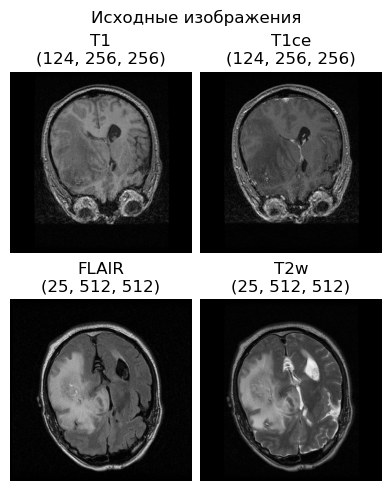

In [2]:
import numpy as np
from glio.jupyter_tools import show_slices, show_slices_arr
from glio.plot import *
import SimpleITK as sitk
t1n = r"D:\vkr\new\nii\5\0\[6] MR Ax 3DT1 SPGR S -- 124 _.nii.gz"
t1c = r"D:\vkr\new\nii\5\0\[8] MR Ax 3DT1 SPGR S+C -- 12_.nii.gz"
flair = r"D:\vkr\new\nii\5\0\[3] MR O-Ax Flair irFSE S -- _.nii.gz"
t2w = r"D:\vkr\new\nii\5\0\[4] MR AX T2 FRFSE -- 25 inst_.nii.gz"

def sitkseq_show_slices(seq): show_slices([sitk.GetArrayFromImage(i) for i in seq])
def sitkseq_grid(seq, title):
    arrs = [sitk.GetArrayFromImage(i) for i in seq]
    qimshow_grid([i[int(i.shape[0]//2)] for i in arrs], labels = (f'T1\n{arrs[0].shape}', f"T1ce\n{arrs[1].shape}", f'FLAIR\n{arrs[2].shape}', f'T2w\n{arrs[3].shape}'), cmap='gray', title=title)

def sitk_imshow(img): qimshow(sitk.GetArrayFromImage(img))
def sitk_show_slices(img): show_slices(sitk.GetArrayFromImage(img))
t1n_orig, t1ce_orig, flair_orig, t2w_orig = [sitk.ReadImage(i) for i in (t1n, t1c, flair, t2w)]


sitkseq_grid((t1n_orig,t1ce_orig, flair_orig, t2w_orig), "Исходные изображения")

In [2]:
import logging
from glio.mri.dicom_to_nifti import dicom2sitk
from glio.mri.registration import register_imgs_to, register_imgs_to_MNI152, register_imgs_to_SRI24, resample_to, register_to
from glio.mri.skullstrip import skullstrip, skullstrip_imgs, get_brain_mask, apply_brain_mask
from glio.mri.crop_bg import crop_bg_imgs
from glio.mri.normalize import znormalize_imgs

def pipeline_dcm(t1:str, t1ce:str, flair:str, t2w:str):
    logging.info("Загрузка T1")
    t1_orig = dicom2sitk(t1)
    logging.info("Загрузка T1ce")
    t1ce_orig = dicom2sitk(t1ce)
    logging.info("Загрузка FLAIR")
    flair_orig = dicom2sitk(flair)
    logging.info("Загрузка T2w")
    t2w_orig = dicom2sitk(t2w)

    logging.info("Регистрация T1CE в MNI")
    t1_mni, t1ce_mni = register_imgs_to_MNI152(t1_orig, t1ce_orig)
    logging.info("Создание маски")
    mask_mni = get_brain_mask(t1ce_mni)

    logging.info("Регистрация модальностей в SRI24")
    imgs_sri = register_imgs_to_SRI24(t1_orig, (t1ce_orig, flair_orig, t2w_orig))
    logging.info("Ресэмплинг маски до T1CE-SRI24")
    mask_sri = resample_to(mask_mni, imgs_sri[1])

    logging.info("Регистрация модальностей в SRI24")
    imgs_skullstripped = [apply_brain_mask(i, mask_sri) for i in imgs_sri]

    logging.info("Нормализация и удаление фона")
    return znormalize_imgs(crop_bg_imgs(imgs_skullstripped))


In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

t1 = r'D:\vkr\new\dcm organized\5\1\[5] MR Ax 3DT1 SPGR S -- 120 _'
t1ce = r'D:\vkr\new\dcm organized\5\1\[7] MR Ax 3DT1 SPGR S+C -- 12_'
flair = r'D:\vkr\new\dcm organized\5\1\[4] MR O-Ax Flair irFSE S -- _'
t2w = r'D:\vkr\new\dcm organized\5\1\[3] MR AX T2 FRFSE -- 27 inst_'

res = pipeline_dcm(t1, t1ce, flair, t2w)
sitkseq_show_slices(res)

INFO:root:Загрузка T1
INFO:root:Загрузка T1ce
INFO:root:Загрузка FLAIR
INFO:root:Загрузка T2w
INFO:root:Регистрация T1CE в MNI
INFO:root:Создание маски
d:\miniconda3\envs\pytorch311\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


File: C:\Users\nkshv\AppData\Local\Temp\tmpb0kwcyze\t1.nii.gz
preprocessing...
image shape after preprocessing:  (126, 155, 131)
prediction (CNN id)...
0
1
2
3
4
exporting segmentation...


INFO:root:Регистрация модальностей в SRI24
INFO:root:Ресэмплинг маски до T1CE-SRI24
INFO:root:Регистрация модальностей в SRI24
INFO:root:Нормализация и удаление фона


interactive(children=(Checkbox(value=False, description='color'), IntSlider(value=1, description='s0', max=3),…

In [10]:
import logging
from glio.mri.dicom_to_nifti import dicom2sitk
from glio.mri.registration import register_imgs_to, register_imgs_to_MNI152, register_imgs_to_SRI24, resample_to, register_to
from glio.mri.skullstrip import skullstrip, skullstrip_imgs, get_brain_mask, apply_brain_mask
from glio.mri.crop_bg import crop_bg_imgs
from glio.mri.normalize import znormalize_imgs

def pipeline_dcm(t1:str, t1ce:str, flair:str, t2w:str):
    logging.info("Загрузка T1")
    t1_orig = dicom2sitk(t1)
    logging.info("Загрузка T1ce")
    t1ce_orig = dicom2sitk(t1ce)
    logging.info("Загрузка FLAIR")
    flair_orig = dicom2sitk(flair)
    logging.info("Загрузка T2w")
    t2w_orig = dicom2sitk(t2w)

    # logging.info("Регистрация T1CE в MNI")
    # t1_mni, t1ce_mni = register_imgs_to_MNI152(t1_orig, t1ce_orig)
    # logging.info("Создание маски")
    # mask_mni = get_brain_mask(t1ce_mni)

    logging.info("Регистрация модальностей в SRI24")
    t1_sri, t1ce_sri, flair_sri, t2w_sri = register_imgs_to_SRI24(t1_orig, (t1ce_orig, flair_orig, t2w_orig))

    logging.info("Удаление черепа")
    t1ce_skullstrip, t1_skullstrip, flair_skullstrip, t2w_skullstrip = skullstrip_imgs(t1ce_sri, (t1_sri, flair_sri, t2w_sri), erode=1)

    logging.info("Нормализация")
    return znormalize_imgs((t1_skullstrip,t1ce_skullstrip,flair_skullstrip, t2w_skullstrip))

In [11]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

t1 = r'D:\vkr\new\dcm organized\5\1\[5] MR Ax 3DT1 SPGR S -- 120 _'
t1ce = r'D:\vkr\new\dcm organized\5\1\[7] MR Ax 3DT1 SPGR S+C -- 12_'
flair = r'D:\vkr\new\dcm organized\5\1\[4] MR O-Ax Flair irFSE S -- _'
t2w = r'D:\vkr\new\dcm organized\5\1\[3] MR AX T2 FRFSE -- 27 inst_'

res = pipeline_dcm(t1, t1ce, flair, t2w)
sitkseq_show_slices(res)

INFO:root:Загрузка T1
INFO:root:Загрузка T1ce
INFO:root:Загрузка FLAIR
INFO:root:Загрузка T2w
INFO:root:Регистрация модальностей в SRI24
INFO:root:Удаление черепа


File: C:\Users\nkshv\AppData\Local\Temp\tmpyu_vj9lh\t1.nii.gz
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
1
2
3
4
exporting segmentation...


INFO:root:Нормализация и удаление фона


interactive(children=(Checkbox(value=False, description='color'), IntSlider(value=1, description='s0', max=3),…